# ML - Aprendizaje No Supervisado

## Clustering

El algoritmo de *K-Means* es uno de los más usados a la hora de aplicar *Clustering*, ya que es un método rápido y eficiente. Vamos a generar un conjunto de datos sintético para aprender a usar esta técnica.


Otras mejoras al algoritmo de *K-Means* incluyen: *K-Means* acelerados (usado por *Scikit-Learn* por defecto y que evita algunos cálculos de distancias) y *mini-batch K-Means* (que puedes usarse si el dataset es tan grande que no cabe en memoria). Vamos a ver un ejemplo de este último caso con el dataset kc_house_data

In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


data = pd.read_csv('kc_house_data.csv') # Cargamos el dataset

# Eliminamos las dos primera columnas que no aportan informacion
data = data.drop(['id','date','price'], axis=1)

from sklearn.model_selection import train_test_split 

X_train, X_test = train_test_split(data, test_size=0.2, random_state=42) # Dividimos el dataset en entrenamiento y test

In [160]:
del data
# Eliminamos las variables que no necesitamos para liberar memoria
X_train

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6325,3,1.75,1780,13095,1.0,0,0,4,9,1780,0,1983,0,98042,47.3670,-122.152,2750,13095
13473,2,1.00,1000,3700,1.0,0,0,3,6,800,200,1929,0,98118,47.5520,-122.290,1270,5000
17614,3,1.00,1080,7486,1.5,0,0,3,6,990,90,1942,0,98146,47.4838,-122.335,1170,7800
16970,3,2.25,2090,7500,1.0,0,0,4,7,1280,810,1977,0,98031,47.3951,-122.172,1800,7350
20868,2,2.50,1741,1439,2.0,0,0,3,8,1446,295,2007,0,98034,47.7043,-122.209,2090,10454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11964,3,1.50,1000,6914,1.0,0,0,3,7,1000,0,1947,0,98125,47.7144,-122.319,1000,6947
21575,3,2.50,3087,5002,2.0,0,0,3,8,3087,0,2014,0,98023,47.2974,-122.349,2927,5183
5390,3,2.50,2120,4780,2.0,0,0,3,7,2120,0,2004,0,98053,47.6810,-122.032,1690,2650
860,1,0.75,380,15000,1.0,0,0,3,5,380,0,1963,0,98168,47.4810,-122.323,1170,15000


In [161]:
def featureNormalize(X):
    X_norm = X.copy()

    #creamos un array de ceros con una longitud igual al número de columnas en el array X. La variable mu y sigma se inicializa como este array de ceros.
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    #Creamos el promedio de cada filaa de X
    #media de cada columna
    mu = np.mean(X, axis = 0)

    #desviacion estandar de cada fila de X
    sigma = np.std(X, axis = 0)

    sigma[sigma == 0] = 1

    #normalizamos los datos con la siguiente formula
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [162]:
X_train, mu, sigma = featureNormalize(X_train)

In [163]:
def load_next_batch(batch_size):
    indices = np.random.choice(len(X_train), batch_size, replace=False)
    return X_train.iloc[indices]

In [164]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17290 entries, 6325 to 15795
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       17290 non-null  float64
 1   bathrooms      17290 non-null  float64
 2   sqft_living    17290 non-null  float64
 3   sqft_lot       17290 non-null  float64
 4   floors         17290 non-null  float64
 5   waterfront     17290 non-null  float64
 6   view           17290 non-null  float64
 7   condition      17290 non-null  float64
 8   grade          17290 non-null  float64
 9   sqft_above     17290 non-null  float64
 10  sqft_basement  17290 non-null  float64
 11  yr_built       17290 non-null  float64
 12  yr_renovated   17290 non-null  float64
 13  zipcode        17290 non-null  float64
 14  lat            17290 non-null  float64
 15  long           17290 non-null  float64
 16  sqft_living15  17290 non-null  float64
 17  sqft_lot15     17290 non-null  float64
dtypes: float

In [165]:
X_train.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6325,-0.395263,-0.474451,-0.323933,-0.043873,-0.919600,-0.084992,-0.305917,0.909073,1.150243,-0.007257,-0.656310,0.404001,-0.208294,-0.674631,-1.396608,0.442288,1.126073,0.013440
13473,-1.468964,-1.452583,-1.183653,-0.285775,-0.919600,-0.084992,-0.305917,-0.625426,-1.413156,-1.200048,-0.200433,-1.430565,-0.208294,0.750604,-0.060172,-0.539958,-1.046523,-0.280662
17614,-0.395263,-1.452583,-1.095477,-0.188293,0.001545,-0.084992,-0.305917,-0.625426,-1.413156,-0.968792,-0.451165,-0.988910,-0.208294,1.275691,-0.552847,-0.860256,-1.193320,-0.178934
16970,-0.395263,0.177636,0.017751,-0.187933,-0.919600,-0.084992,-0.305917,0.909073,-0.558690,-0.615824,1.189993,0.200160,-0.208294,-0.880915,-1.193614,0.299934,-0.268498,-0.195283
20868,-1.468964,0.503680,-0.366919,-0.343991,0.922690,-0.084992,-0.305917,-0.625426,0.295777,-0.413779,0.016109,1.219364,-0.208294,-0.824656,1.040039,0.036578,0.157213,-0.082511


In [166]:
from sklearn.cluster import MiniBatchKMeans

k = 2
n_init = 10
n_iterations = 100
batch_size = 100
init_size = 500
evaluate_on_last_n_iters = 10

best_kmeans = None # Definimos los parametros para el modelo de clustering

for init in range(n_init):
    minibatch_kmeans = MiniBatchKMeans(n_clusters=k, init_size=init_size) # Instanciamos el modelo
    X_init = load_next_batch(init_size) # Cargamos los datos en lotes 
    minibatch_kmeans.partial_fit(X_init) # Ajustamos el modelo

    minibatch_kmeans.sum_inertia_ = 0 # Calculamos la inercia del modelo
    for iteration in range(n_iterations): # Ajustamos el modelo en cada iteracion
        X_batch = load_next_batch(batch_size) # Cargamos los datos en lotes
        minibatch_kmeans.partial_fit(X_batch) # Ajustamos el modelo
        if iteration >= n_iterations - evaluate_on_last_n_iters:
            minibatch_kmeans.sum_inertia_ += minibatch_kmeans.inertia_ # Calculamos la inercia del modelo

    if (best_kmeans is None or
        minibatch_kmeans.sum_inertia_ < best_kmeans.sum_inertia_):
        best_kmeans = minibatch_kmeans # Ajustamos el modelo de clustering

In [167]:
best_kmeans.score(X_train) # Obtenemos el score del modelo

-254133.68535138044

In [168]:
from sklearn.metrics import silhouette_score
kmeans = KMeans(n_clusters=2, random_state=42)
y_pred = kmeans.fit_predict(X_train)
silhouette_avg = silhouette_score(X_train, y_pred) # Calculamos el score de silueta del modelo
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.2134972358758049


Número de clusters: 2, Puntaje de la silueta: 0.2134972358758049
Número de clusters: 3, Puntaje de la silueta: 0.1959829010439732
Número de clusters: 4, Puntaje de la silueta: 0.1469555058185408
Número de clusters: 5, Puntaje de la silueta: 0.138490302770109
Número de clusters: 6, Puntaje de la silueta: 0.15112276309051656
Número de clusters: 7, Puntaje de la silueta: 0.16282210884276896
Número de clusters: 8, Puntaje de la silueta: 0.1619768429256121
Número de clusters: 9, Puntaje de la silueta: 0.16812048351230527
Número de clusters: 10, Puntaje de la silueta: 0.18277074633966367
Número de clusters: 11, Puntaje de la silueta: 0.18009887969886787
Número de clusters: 12, Puntaje de la silueta: 0.17128337568841812
Número de clusters: 13, Puntaje de la silueta: 0.1721379376200101
Número de clusters: 14, Puntaje de la silueta: 0.17479133208981024
Número de clusters: 15, Puntaje de la silueta: 0.17049259188695362
Número de clusters: 16, Puntaje de la silueta: 0.16296018634529638
Número de 

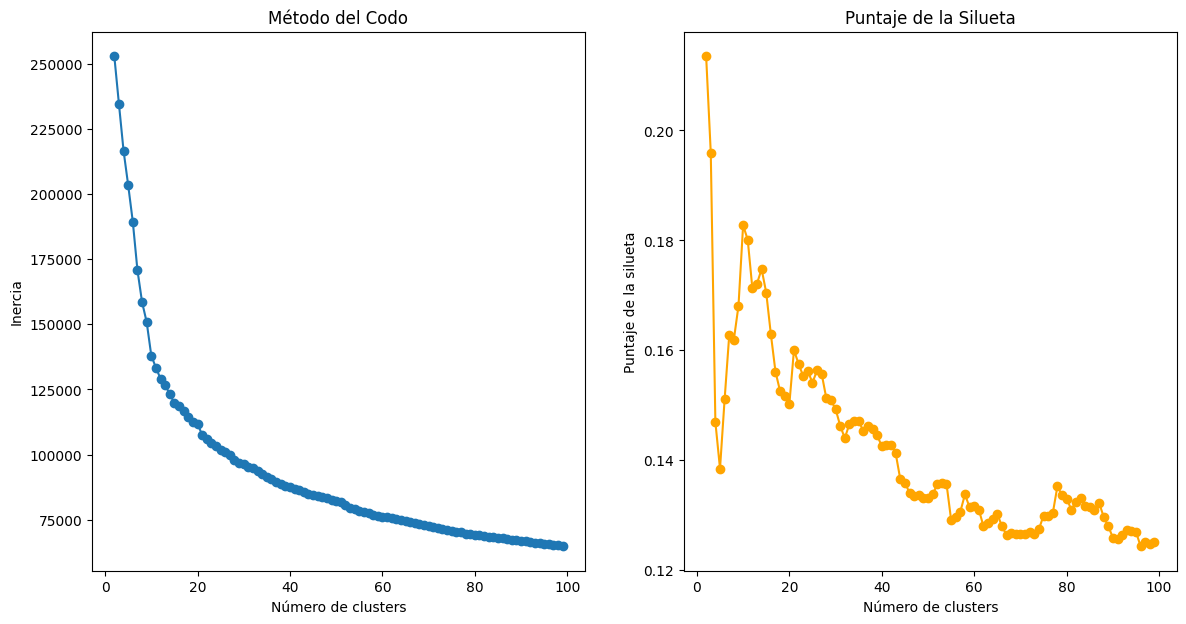

In [169]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

# Datos escalados (asegúrate de tener la variable 'scaled_data' definida con tus datos)
# scaled_data = ...

# Método del codo
inercias = []
silhouette_scores = []

for k in range(2,100):  # La silueta no se define para k=1
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train)
    inercias.append(kmeans.inertia_)
    
    # Calcular el puntaje de la silueta y añadirlo a la lista
    score = silhouette_score(X_train, kmeans.labels_)
    silhouette_scores.append(score)
    print(f'Número de clusters: {k}, Puntaje de la silueta: {score}')

# Gráfica del método del codo
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.plot(range(1, 100), [np.nan] + inercias, marker='o')  # Agregar np.nan para el índice 0
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')
plt.title('Método del Codo')

# Gráfica del puntaje de la silueta
plt.subplot(1, 2, 2)
plt.plot(range(2, 100), silhouette_scores, marker='o', color='orange')
plt.xlabel('Número de clusters')
plt.ylabel('Puntaje de la silueta')
plt.title('Puntaje de la Silueta')

plt.show()

In [170]:
X_test, mu, sigma = featureNormalize(X_test)

In [171]:
def load_next_batch(batch_size):
    indices = np.random.choice(len(X_test), batch_size, replace=False)
    return X_test.iloc[indices]

In [172]:
from sklearn.cluster import MiniBatchKMeans

k = 2
n_init = 10
n_iterations = 100
batch_size = 100
init_size = 500
evaluate_on_last_n_iters = 10

best_kmeans = None # Definimos los parametros para el modelo de clustering

for init in range(n_init):
    minibatch_kmeans = MiniBatchKMeans(n_clusters=k, init_size=init_size) # Instanciamos el modelo
    X_init = load_next_batch(init_size) # Cargamos los datos en lotes 
    minibatch_kmeans.partial_fit(X_init) # Ajustamos el modelo

    minibatch_kmeans.sum_inertia_ = 0 # Calculamos la inercia del modelo
    for iteration in range(n_iterations): # Ajustamos el modelo en cada iteracion
        X_batch = load_next_batch(batch_size) # Cargamos los datos en lotes
        minibatch_kmeans.partial_fit(X_batch) # Ajustamos el modelo
        if iteration >= n_iterations - evaluate_on_last_n_iters:
            minibatch_kmeans.sum_inertia_ += minibatch_kmeans.inertia_ # Calculamos la inercia del modelo

    if (best_kmeans is None or
        minibatch_kmeans.sum_inertia_ < best_kmeans.sum_inertia_):
        best_kmeans = minibatch_kmeans # Ajustamos el modelo de clustering

In [173]:
from sklearn.metrics import silhouette_score
kmeans = KMeans(n_clusters=2, random_state=42)
y_pred_TEST = kmeans.fit_predict(X_test)
silhouette_avg = silhouette_score(X_test, y_pred_TEST) # Calculamos el score de silueta del modelo
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.6117814509410772
